In [ ]:
Clustering: Hierarchical 
Dataset: Cities_r2.csv
Apply Data pre-processing (Label Encoding , Data 
Transformation….) techniques if necessary.
Apply Hierarchical clusteringalgorithms (based on
effective_literacy_rate_total column) to find the group of customers.

In [6]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering


In [2]:
data = pd.read_csv('cities_r2.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [4]:
data.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [8]:
numeric_data = data.drop(['location','state_name','name_of_city'],axis = 1)

In [9]:
label_encoder = LabelEncoder()

In [11]:
data['location'] = label_encoder.fit_transform(data['location'])
data['state_name'] = label_encoder.fit_transform(data['state_name'])
data['name_of_city'] = label_encoder.fit_transform(data['name_of_city'])

In [12]:
scaler = StandardScaler()

In [13]:
scaled_data = scaler.fit_transform(numeric_data)

In [14]:
data_encoded = data.copy()

In [15]:
X = data_encoded[['effective_literacy_rate_total']]

In [16]:
cluster =  AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [18]:
data['cluster'] = cluster.fit_predict(X)

C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


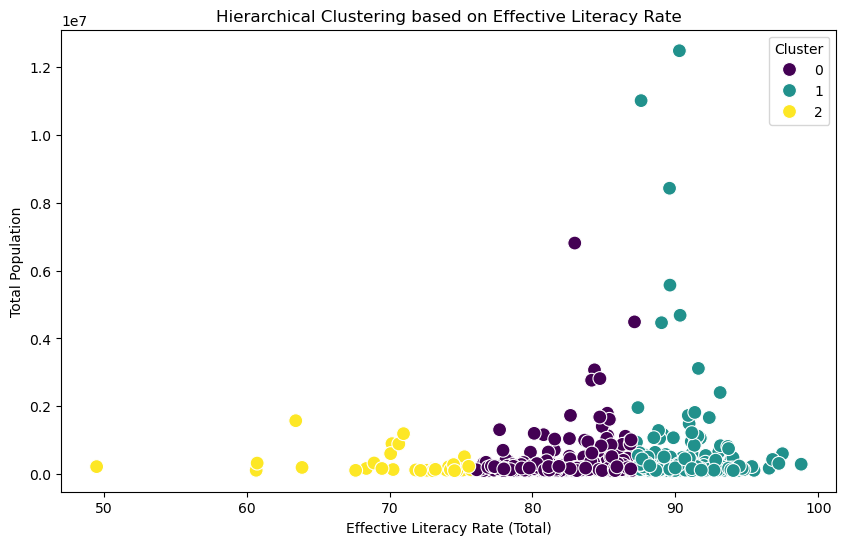

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'effective_literacy_rate_total', y = 'population_total',hue = 'cluster', data = data, palette = 'viridis',s = 100)
plt.title('Hierarchical Clustering based on Effective Literacy Rate')
plt.xlabel('Effective Literacy Rate (Total)')
plt.ylabel('Total Population')
plt.legend(title='Cluster')
plt.show()

In [23]:
cluster_info = data.groupby('cluster')['name_of_city'].unique()
for idx, cities in cluster_info.items():
    print(f'Cluster {idx + 1}: {cities}')

Cluster 1: [  0   2   3  11  16  17  23  26  29  30  31  32  34  36  39  45  46  49
  51  52  53  56  60  62  64  65  66  67  68  70  72  74  75  76  77  78
  79  81  82  84  85  86  87  88  89  90  98  99 101 103 106 107 109 110
 111 114 116 117 119 124 125 131 132 133 135 136 137 139 142 143 145 146
 148 152 158 160 161 162 163 165 167 168 169 171 172 173 174 175 176 178
 179 180 182 183 185 186 187 188 190 191 193 195 197 199 202 203 205 206
 208 209 211 214 222 223 224 225 227 231 234 235 236 237 239 240 242 243
 244 250 251 253 254 255 256 257 258 259 260 261 262 264 265 267 269 271
 273 275 276 279 282 283 284 285 287 288 289 290 294 296 297 298 300 301
 302 304 305 306 308 310 311 313 315 316 318 319 320 322 323 324 325 331
 335 337 338 339 340 345 346 349 353 354 358 359 361 364 366 369 370 373
 374 376 382 383 384 385 387 388 389 398 400 406 411 412 413 414 417 418
 420 421 423 427 428 432 433 435 436 437 438 439 440 443 446 449 450 451
 454 456 465 467 469 471 473 475 476 480